# **Analyzing and Predicting Solar Activity: A Comprehensive Study of Sunspot Numbers Using Statistical and Machine Learning Techniques**

## Detailed Introduction

### Background and Significance

The Sun, our nearest star, plays a crucial role in influencing the space environment around Earth and beyond. Solar activity, characterized by various phenomena such as sunspots, solar flares, and coronal mass ejections, directly impacts space weather, which in turn affects satellite operations, communication systems, power grids, and even climate patterns on Earth. Understanding and predicting solar activity is therefore of paramount importance for both scientific research and practical applications.

One of the primary indicators of solar activity is the sunspot number (SSN), which counts the number of sunspots visible on the Sun's surface. Sunspots are dark, cooler areas on the Sun’s photosphere caused by magnetic field concentrations. The frequency and intensity of sunspots follow an approximately 11-year cycle known as the solar cycle, which consists of periods of solar maximum (high activity) and solar minimum (low activity). By studying sunspot numbers and related parameters, scientists can gain insights into the behavior of the solar cycle and predict future solar activity.

### Project Objectives

The primary objective of this project is to analyze historical sunspot data and related parameters to uncover trends, periodicities, and relationships in solar activity. This analysis will provide a better understanding of solar cycles and their implications for space weather and terrestrial impacts. Specifically, the project aims to:
1. **Analyze Trends**: Investigate long-term trends in sunspot numbers to determine whether solar activity is increasing, decreasing, or stable over time.
2. **Identify Solar Cycles**: Detect solar cycle maxima and minima, calculate cycle lengths and amplitudes, and analyze their variability.
3. **Explore Relationships**: Examine correlations between sunspot numbers and other variables such as the number of observations, standard deviation, and deficit in observations.
4. **Forecast Solar Activity**: Use time series forecasting models to predict future sunspot numbers.
5. **Classify Solar Activity**: Apply machine learning techniques to classify periods of high and low solar activity.
6. **Estimate Solar Irradiance**: Estimate variations in total solar irradiance based on sunspot numbers and explore their potential impacts on Earth’s climate.

### Data Description

The dataset used for this project, `SN_y_tot_V2.0.csv`, contains the following columns:
- **year**: The year of observation.
- **ssn (sunspot number)**: The total number of sunspots observed in that year.
- **sd (standard deviation)**: The standard deviation of the sunspot numbers, indicating the variability within the year.
- **n_obs (number of observations)**: The number of observations recorded for that year.
- **def (deficit)**: The deficit in the number of sunspot observations, indicating potential gaps or inaccuracies in the data.

This dataset provides a comprehensive view of solar activity over an extended period, allowing for detailed analysis of trends, cycles, and relationships.

### Methodology

The analysis in this project is structured as follows:
1. **Data Exploration and Descriptive Statistics**: Initial examination of the dataset to summarize key statistics and visualize data distributions.
2. **Trend Analysis**: Application of linear regression to identify long-term trends in sunspot numbers.
3. **Solar Cycle Analysis**: Identification of solar cycle peaks using peak detection algorithms, calculation of cycle lengths and amplitudes, and visualization of cycles.
4. **Correlation Analysis**: Computation of correlation coefficients to explore relationships between sunspot numbers and other variables.
5. **Time Series Analysis**: Use of Fourier Transform to identify periodicities in sunspot numbers and predict future values using ARIMA and LSTM models.
6. **Classification and Clustering**: Application of logistic regression, support vector machines, and k-means clustering to classify and identify patterns in solar activity.
7. **Solar Irradiance Estimation**: Estimation of total solar irradiance variations based on sunspot numbers and analysis of potential climatic impacts.

### Importance of the Study

Understanding and predicting solar activity is crucial for several reasons:
- **Space Weather Prediction**: Accurate forecasts of solar activity help mitigate the risks posed by space weather to satellites, astronauts, and technological systems on Earth.
- **Climate Studies**: Variations in solar irradiance due to changes in sunspot numbers can influence Earth’s climate, making it essential to understand these relationships.
- **Scientific Research**: Studying sunspots and solar cycles contributes to our knowledge of stellar physics and the behavior of stars similar to the Sun.

By leveraging statistical analysis and machine learning techniques, this project aims to provide valuable insights into solar activity, contributing to the broader field of heliophysics and aiding in the development of predictive models for space weather and climate impacts.

In [1]:
# Analysing the yearly sunspot activity

import matplotlib.pyplot as plt
import pandas as pd
from scipy.fft import fft
import numpy as np
# read the data and assign column names
df = pd.read_csv('SN_y_tot_V2.0.csv', delimiter=';', header=None,
                 names=('year', 'ssn', 'sd', 'n_obs',
                        'def'))

# create numpy arrays of date and sunspot number
d_ssn = df.loc[:, 'ssn']
d_year = df.loc[:, 'year']
d_ssn = d_ssn.to_numpy()
d_year = d_year.to_numpy()

In [2]:
df

,year,ssn,sd,n_obs,def
0,1700.5,8.3,-1.0,-1,1
1,1701.5,18.3,-1.0,-1,1
2,1702.5,26.7,-1.0,-1,1
3,1703.5,38.3,-1.0,-1,1
4,1704.5,60.0,-1.0,-1,1
...,...,...,...,...,...
316,2016.5,39.8,3.9,9940,1
317,2017.5,21.7,2.5,11444,1
318,2018.5,7.0,1.1,12611,1
319,2019.5,3.6,0.5,12884,1


In [4]:
df.describe()

,year,ssn,sd,n_obs,def
count,321.000000,321.000000,321.000000,321.000000,321.000000
mean,1860.500000,78.516511,4.618692,1065.461059,0.996885
std,92.808944,62.092225,5.280805,2433.197567,0.055815
min,1700.500000,0.000000,-1.000000,-1.000000,0.000000
25%,1780.500000,24.200000,-1.000000,-1.000000,1.000000
50%,1860.500000,65.300000,4.100000,365.000000,1.000000
75%,1940.500000,115.200000,8.900000,365.000000,1.000000
max,2020.500000,269.300000,19.100000,13124.000000,1.000000


In [11]:
# Check for missing values
print(df.isnull().sum())

# Drop rows with missing values
df_cleaned = df.dropna()

# Fill missing values with a specified value (e.g., 0)
df_filled = df.fillna(0)

year     0
ssn      0
sd       0
n_obs    0
def      0
dtype: int64


In [12]:
# Select a specific column
ssn_column = df['ssn']

# Filter rows based on a condition (e.g., years after 1900)
filtered_df = df[df['year'] > 1900]

# Select specific rows and columns
subset_df = df.loc[df['year'] > 1900, ['year', 'ssn']]

### Aggregation and Grouping

In [13]:
# Group by a specific column and calculate the mean of other columns
mean_ssn_per_year = df.groupby('year')['ssn'].mean()

# Aggregate data using multiple functions
aggregated_df = df.groupby('year').agg({'ssn': ['mean', 'max'], 'n_obs': 'sum'})

In [14]:
aggregated_df

ssn        n_obs
        mean   max    sum
year                     
1700.5   8.3   8.3     -1
1701.5  18.3  18.3     -1
1702.5  26.7  26.7     -1
1703.5  38.3  38.3     -1
1704.5  60.0  60.0     -1
...      ...   ...    ...
2016.5  39.8  39.8   9940
2017.5  21.7  21.7  11444
2018.5   7.0   7.0  12611
2019.5   3.6   3.6  12884
2020.5   8.6   8.6  13124

[321 rows x 3 columns]

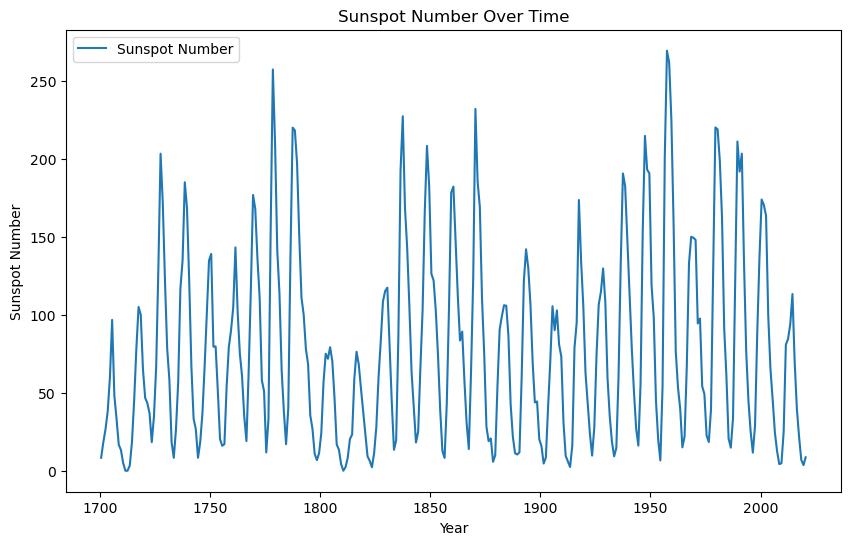

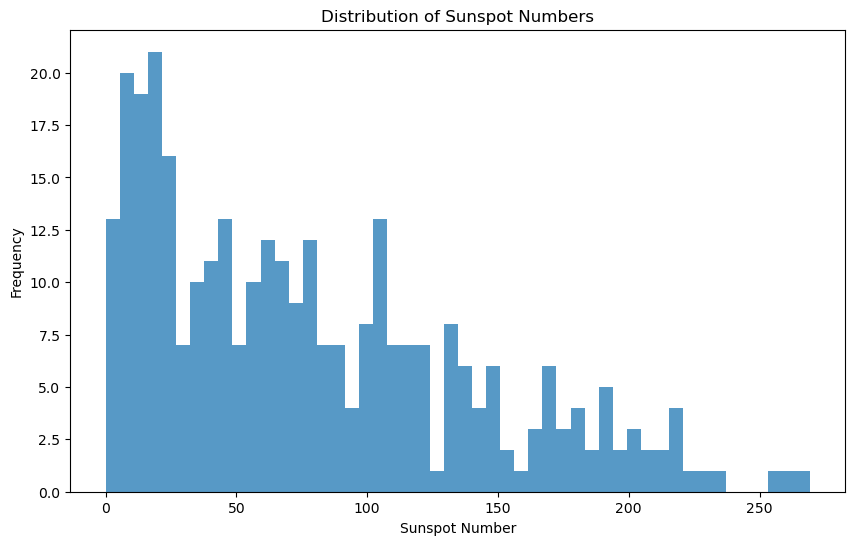

In [15]:
# Line plot of sunspot number over time
plt.figure(figsize=(10, 6))
plt.plot(df['year'], df['ssn'], label='Sunspot Number')
plt.xlabel('Year')
plt.ylabel('Sunspot Number')
plt.title('Sunspot Number Over Time')
plt.legend()
plt.show()

# Histogram of sunspot numbers
plt.figure(figsize=(10, 6))
plt.hist(df['ssn'], bins=50, alpha=0.75)
plt.xlabel('Sunspot Number')
plt.ylabel('Frequency')
plt.title('Distribution of Sunspot Numbers')
plt.show()

### Time Series Analysis

In [16]:
# Convert year to datetime format (if not already in a time series format)
df['date'] = pd.to_datetime(df['year'], format='%Y')

# Set the date as the index
df.set_index('date', inplace=True)

# Resample the data to calculate the annual mean sunspot number
annual_mean_ssn = df['ssn'].resample('A').mean()

In [17]:
annual_mean_ssn

date
1700-12-31     8.3
1701-12-31    18.3
1702-12-31    26.7
1703-12-31    38.3
1704-12-31    60.0
              ... 
2016-12-31    39.8
2017-12-31    21.7
2018-12-31     7.0
2019-12-31     3.6
2020-12-31     8.6
Freq: A-DEC, Name: ssn, Length: 321, dtype: float64

In [18]:
# Save the cleaned DataFrame to a new CSV file
df_cleaned.to_csv('cleaned_sunspot_data.csv', index=False)

# Save a subset of the DataFrame to a new CSV file
subset_df.to_csv('subset_sunspot_data.csv', index=False)

Correlation between sunspot number and number of observations: -0.04370250988567198


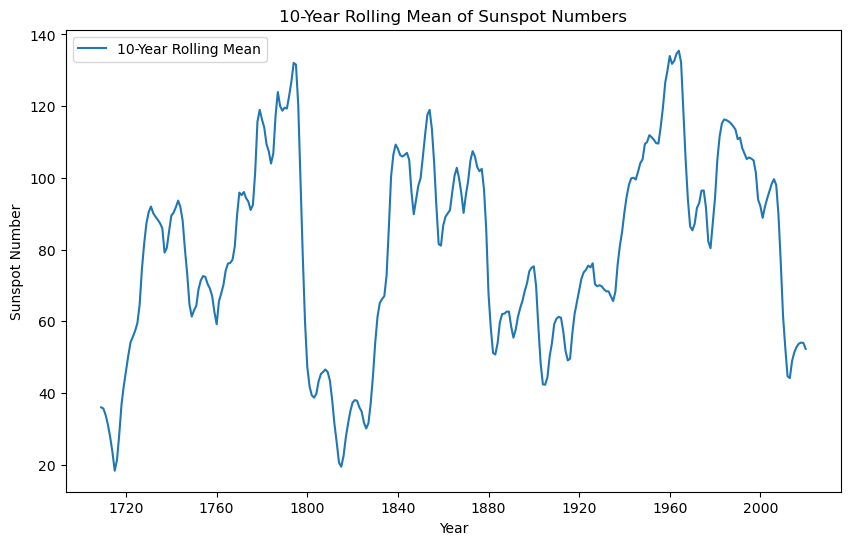

In [19]:
# Calculate the correlation between sunspot number and number of observations
correlation = df['ssn'].corr(df['n_obs'])
print(f"Correlation between sunspot number and number of observations: {correlation}")

# Perform a rolling window analysis (e.g., 10-year rolling mean of sunspot numbers)
df['rolling_mean_ssn'] = df['ssn'].rolling(window=10).mean()

# Plot the rolling mean
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['rolling_mean_ssn'], label='10-Year Rolling Mean')
plt.xlabel('Year')
plt.ylabel('Sunspot Number')
plt.title('10-Year Rolling Mean of Sunspot Numbers')
plt.legend()
plt.show()

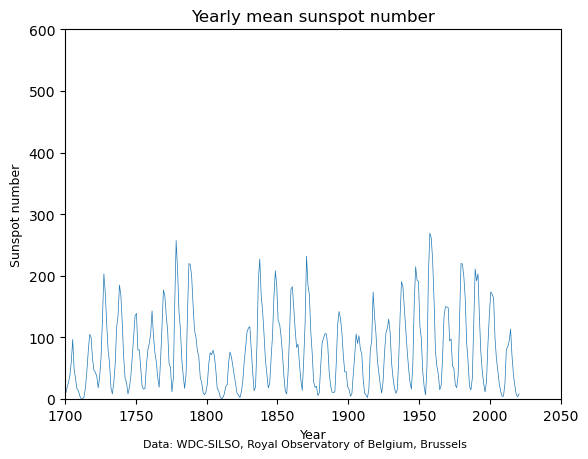

In [5]:
fig = plt.figure()
plt.plot(d_year, d_ssn, linewidth=0.5)
plt.axis([1700, 2050, 0, 600])
plt.xlabel('Year', fontsize=9)
plt.ylabel('Sunspot number', fontsize=9)
plt.title('Yearly mean sunspot number')
plt.figtext(0.5, 0.01, 'Data: WDC-SILSO, Royal Observatory of Belgium, Brussels',
            ha='center', fontsize=8)
plt.show()

First entry in array:  (25203.8-0j)
Sum of the data:  25203.800000000003


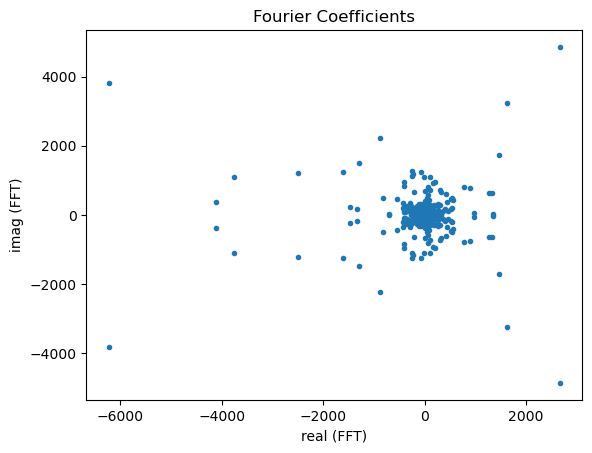

In [6]:
# use Fast Fourier Transform on sunspot numbers
sp_fft = fft(d_ssn)
# the first entry is simply the sum of the data and we delete it
print("First entry in array: ", sp_fft[0])
print("Sum of the data: ", np.sum(d_ssn))
sp_fft = np.delete(sp_fft, 0)
sp_fft[0]
sp_fft_real = sp_fft.real
sp_fft_imag = sp_fft.imag
# plot Fourier coefficients in the Complex Plane
fig = plt.figure()
plt.scatter(sp_fft_real, sp_fft_imag, marker='.')
plt.xlabel('real (FFT)')
plt.ylabel('imag (FFT)')
plt.title('Fourier Coefficients')
plt.show()


# Fourier coefficients are difficult to interpret. Squaring the magnitude of
# the coefficients is a measure of power. In the FFT array half of the
# coefficients are repeated in magnitude, so it is sufficient to calculate the
# power of one half.
# Plot the power spectrum as a function of frequency, measured in cycles per year.


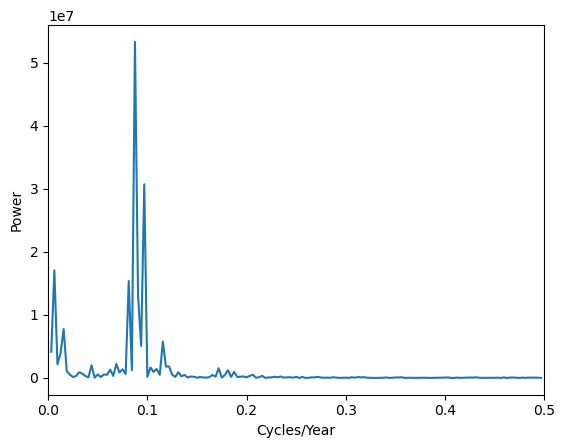

In [7]:
n = len(sp_fft)
power = abs(sp_fft[0:((n + 1) // 2)])**2
nyquist = 0.5
freq = np.array(range(n // 2)) / (n // 2) * nyquist
freq = np.delete(freq, 0)
power = np.delete(power, 0)
fig = plt.figure()
plt.plot(freq, power)
plt.xlim(0, 0.5)
plt.ylabel('Power')
plt.xlabel('Cycles/Year')
plt.show()


# The frequency for the maximum sunspot activity is less than one year. Changing
# to period instead of cycles is easier to interpret.
# The plot indicates a sunspot cycle between 11 and 12 years.


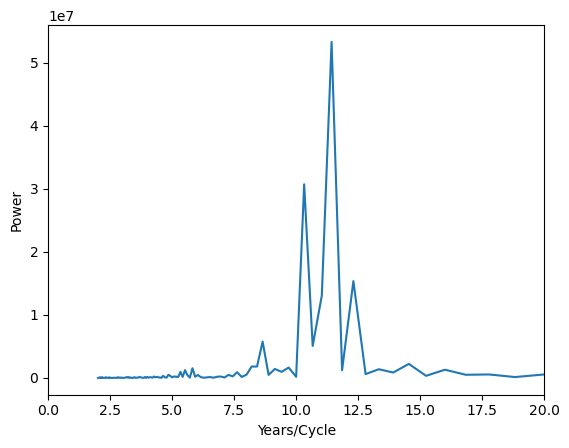

In [8]:
period = 1 / freq
fig = plt.figure()
plt.plot(period, power)
plt.xlim(0, 20)
plt.xlabel('Years/Cycle')
plt.ylabel('Power')
plt.show()


# Changing the limit of the plot, we see a cycle of about 11.4 years.


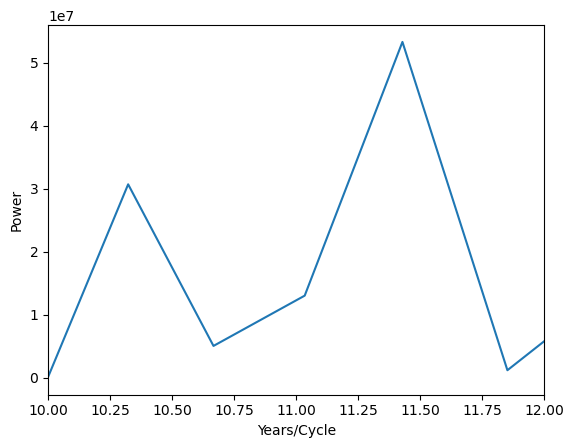

In [9]:
period = 1 / freq
fig = plt.figure()
plt.plot(period, power)
plt.xlim(10, 12)
plt.xlabel('Years/Cycle')
plt.ylabel('Power')
plt.show()



### 1. Sunspot Number Analysis
- The sunspot number (SSN) is a key indicator of solar activity. You can analyze its trends, periodicities, and correlations with other solar parameters.

**Calculate Yearly Mean Sunspot Number**

In [20]:
# Calculate the yearly mean sunspot number
yearly_mean_ssn = df.groupby('year')['ssn'].mean()

In [21]:
yearly_mean_ssn

year
1700.5     8.3
1701.5    18.3
1702.5    26.7
1703.5    38.3
1704.5    60.0
          ... 
2016.5    39.8
2017.5    21.7
2018.5     7.0
2019.5     3.6
2020.5     8.6
Name: ssn, Length: 321, dtype: float64

 - **Calculate Solar Cycle Length**
     - Solar cycles typically last about 11 years. You can identify the length of each cycle by finding the peaks in sunspot numbers.

In [23]:
# Code

### 2. Solar Irradiance Variations
Variations in sunspot number affect solar irradiance. While you may not have direct irradiance data, you can infer periods of higher or lower irradiance based on sunspot activity.

Estimate Solar Irradiance Variations
You can use an empirical relationship between sunspot number and total solar irradiance (TSI). A simple linear approximation could be:
Δ
TSI
≈
𝑘
×
SSN
ΔTSI≈k×SSN
where 
𝑘
k is a constant that you need to determine from historical data.

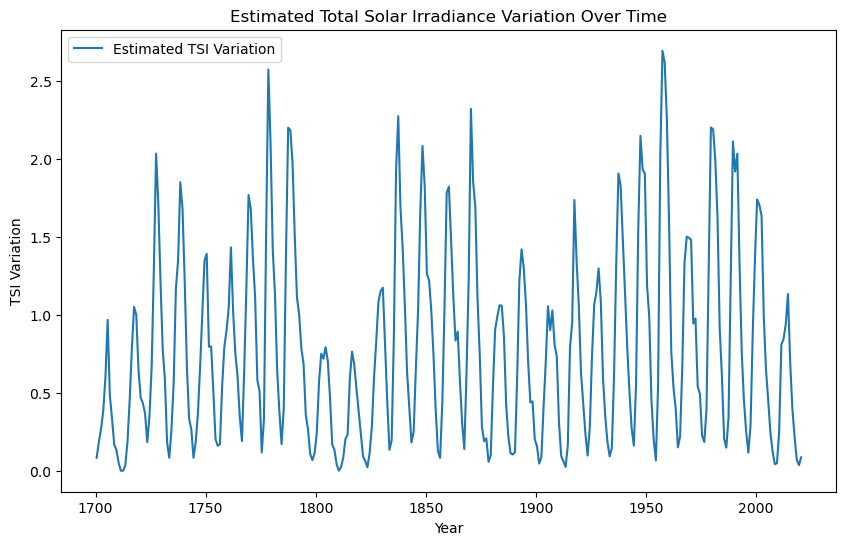

In [32]:
# Assuming k = 0.01 (this is an illustrative example; the actual value should be derived from data)
k = 0.01
df['tsi_variation'] = k * df['ssn']

plt.figure(figsize=(10, 6))
plt.plot(df['year'], df['tsi_variation'], label='Estimated TSI Variation')
plt.xlabel('Year')
plt.ylabel('TSI Variation')
plt.title('Estimated Total Solar Irradiance Variation Over Time')
plt.legend()
plt.show()

In [25]:
df['tsi_variation']

date
1700-01-01    0.083
1701-01-01    0.183
1702-01-01    0.267
1703-01-01    0.383
1704-01-01    0.600
              ...  
2016-01-01    0.398
2017-01-01    0.217
2018-01-01    0.070
2019-01-01    0.036
2020-01-01    0.086
Name: tsi_variation, Length: 321, dtype: float64

### 3. Correlations with Other Solar Parameters
- You can explore correlations between sunspot numbers and other columns in your dataset, such as the number of observations (n_obs) or the standard deviation (sd).

In [26]:
# Calculate correlation matrix
correlation_matrix = df[['ssn', 'sd', 'n_obs', 'def']].corr()
print(correlation_matrix)

            ssn        sd     n_obs       def
ssn    1.000000  0.470501 -0.043703  0.063044
sd     0.470501  1.000000  0.117554  0.021403
n_obs -0.043703  0.117554  1.000000 -0.277472
def    0.063044  0.021403 -0.277472  1.000000


### 4. Unspot Deficit Analysis
- Analyze the deficit (def) in sunspot observations, which can indicate periods of low solar activity or observational limitations.

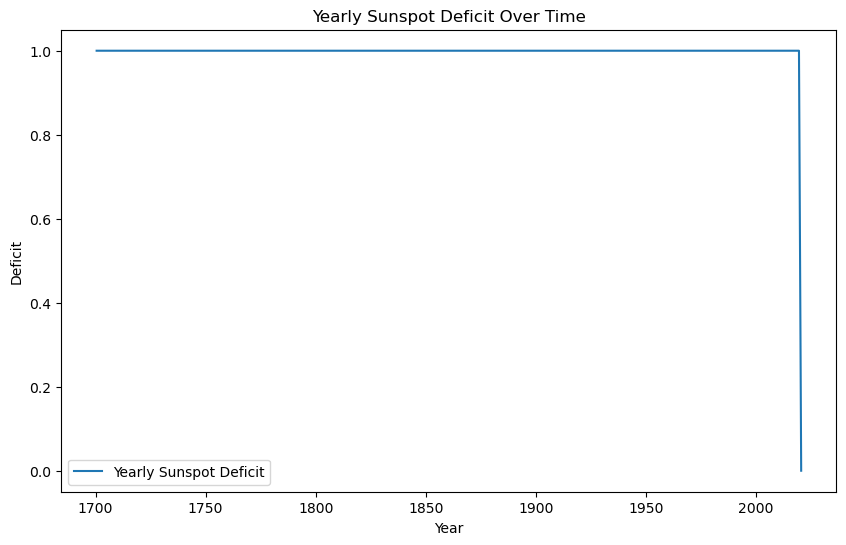

In [27]:
# Calculate yearly sum of deficit
yearly_deficit = df.groupby('year')['def'].sum()

# Plot the yearly deficit
plt.figure(figsize=(10, 6))
plt.plot(yearly_deficit.index, yearly_deficit.values, label='Yearly Sunspot Deficit')
plt.xlabel('Year')
plt.ylabel('Deficit')
plt.title('Yearly Sunspot Deficit Over Time')
plt.legend()
plt.show()

In [31]:
from scipy.stats import ttest_ind

# Split data into two periods
before_1900 = df[df['year'] < 1900]['ssn'].dropna()
after_1900 = df[df['year'] >= 1900]['ssn'].dropna()

# Perform t-test
t_stat, p_value = ttest_ind(before_1900, after_1900)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: -1.517939616336724, P-value: 0.13002001209902836


Slope: 0.07439020142799095, Intercept: -59.88645885335036, R-squared: 0.012363364624603435, P-value: 0.0465304377618728


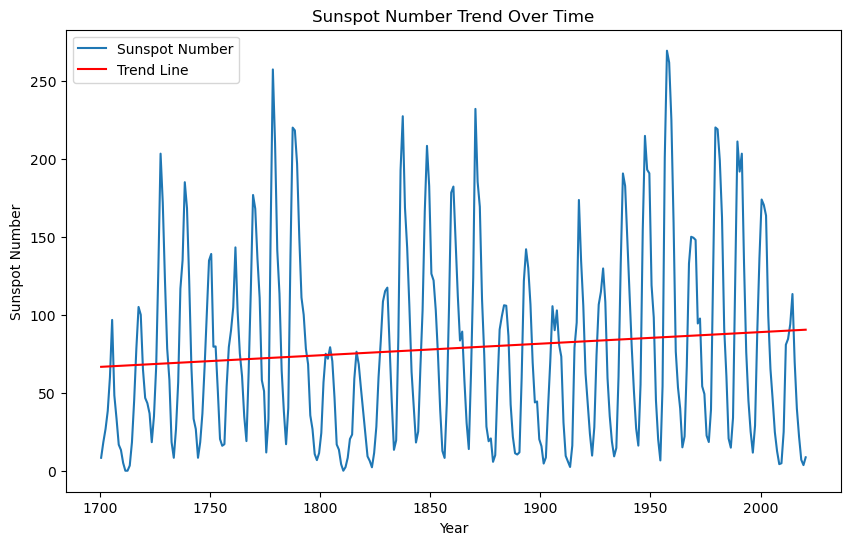

In [34]:
from scipy.stats import linregress

# Linear regression to find trend in sunspot numbers
slope, intercept, r_value, p_value, std_err = linregress(df['year'], df['ssn'])
print(f"Slope: {slope}, Intercept: {intercept}, R-squared: {r_value**2}, P-value: {p_value}")

# Plot the trend
plt.figure(figsize=(10, 6))
plt.plot(df['year'], df['ssn'], label='Sunspot Number')
plt.plot(df['year'], intercept + slope * df['year'], 'r', label='Trend Line')
plt.xlabel('Year')
plt.ylabel('Sunspot Number')
plt.title('Sunspot Number Trend Over Time')
plt.legend()
plt.show()

---
---

## Machine Learning

### 1. Time Series Forecasting
Using time series forecasting models to predict future sunspot numbers based on historical data.

- ARIMA (AutoRegressive Integrated Moving Average)
- ARIMA is a popular model for time series forecasting.

In [35]:
from statsmodels.tsa.arima_model import ARIMA

# Fit ARIMA model
model = ARIMA(df['ssn'], order=(5, 1, 0))  # You may need to optimize the order (p, d, q)
model_fit = model.fit(disp=0)

# Forecast future values
forecast, stderr, conf_int = model_fit.forecast(steps=10)
print(f"Forecasted Sunspot Numbers: {forecast}")

NotImplementedError: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.


#### LSTM (Long Short-Term Memory) Neural Network
LSTM networks are particularly suited for time series data.

In [36]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Prepare data for LSTM
data = df['ssn'].values
data = data.reshape((len(data), 1))

# Normalize the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Create sequences of data for LSTM
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data)-seq_length):
        x = data[i:i+seq_length]
        y = data[i+seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

seq_length = 10
X, y = create_sequences(scaled_data, seq_length)
X = X.reshape((X.shape[0], X.shape[1], 1))

# Define the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(seq_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Fit the model
model.fit(X, y, epochs=200, verbose=0)

# Make predictions
predictions = model.predict(X)
predicted_sunspots = scaler.inverse_transform(predictions)
print(predicted_sunspots)

G:\Anaconda\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
[[  8.929267  ]
 [  6.359458  ]
 [  8.144411  ]
 [ 18.210804  ]
 [ 27.34665   ]
 [ 41.38095   ]
 [ 59.366634  ]
 [ 83.80042   ]
 [ 92.63824   ]
 [ 81.47768   ]
 [ 50.476036  ]
 [ 30.539783  ]
 [ 28.620214  ]
 [ 28.163351  ]
 [ 20.881762  ]
 [ 59.726944  ]
 [103.64943   ]
 [157.66444   ]
 [177.17606   ]
 [128.60553   ]
 [ 87.53912   ]
 [ 55.84306   ]
 [ 35.673172  ]
 [  3.1297846 ]
 [ 23.280428  ]
 [ 81.19318   ]
 [108.32521   ]
 [166.97838   ]
 [137.48438   ]
 [162.4297    ]
 [125.85956   ]
 [ 85.617615  ]
 [ 44.40099   ]
 [ 12.725551  ]
 [ 27.252987  ]
 [ 32.79324   ]
 [ 64.435104  ]
 [ 80.99981   ]
 [105.52278   ]
 [129.24155   ]
 [130.2924    ]
 [110.26006   ]
 [ 62.643867  ]
 [ 56.944275  ]
 [ 31.280334  ]
 [  7.7581935 ]
 [ 28.39385   ]
 [ 52.076855  ]
 [106.51511   ]
 [114.90238   ]
 [106.73175   ]
 [107.310646  ]
 [118.45719   ]
 [ 77.801476  ]
 [ 53.53646   ]
 [ 40.06467   ]
 [ 22.621874  ]
 [ 28.30596   ]
 [113.25331   ]
 [167.79291   ]


### 2. Regression Analysis
- Using regression models to understand the relationship between sunspot numbers and other variables.

**Linear Regression**

In [37]:
from sklearn.linear_model import LinearRegression

# Prepare the data
X = df[['year', 'n_obs', 'sd', 'def']].values
y = df['ssn'].values

# Fit the linear regression model
reg = LinearRegression().fit(X, y)
print(f"Regression Coefficients: {reg.coef_}")
print(f"Intercept: {reg.intercept_}")

# Predict sunspot numbers
predicted_ssn = reg.predict(X)

Regression Coefficients: [-1.68094276e-01  1.17750479e-03  7.11230207e+00  4.29968163e+01]
Intercept: 314.2889258689684


**Random Forest Regression**

In [38]:
from sklearn.ensemble import RandomForestRegressor

# Fit the random forest model
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X, y)

# Predict sunspot numbers
predicted_ssn_rf = rf.predict(X)

In [39]:
predicted_ssn_rf

array([ 14.175,  18.675,  25.643,  37.887,  56.73 ,  80.218,  60.923,
        34.243,  22.079,  14.352,   7.392,   1.731,   0.613,   3.327,
        17.937,  36.588,  71.593,  94.376,  96.05 ,  71.403,  48.056,
        44.541,  36.325,  25.035,  36.914,  64.119, 116.324, 172.802,
       169.914, 130.39 ,  87.849,  59.086,  29.618,  13.572,  25.7  ,
        51.18 , 102.212, 131.01 , 167.582, 164.665, 126.619,  83.792,
        41.792,  28.478,  13.38 ,  17.924,  34.848,  64.978,  91.501,
       122.801, 128.923,  94.493,  76.213,  56.626,  29.512,  18.078,
        19.346,  42.986,  74.294,  87.433, 103.806, 125.584, 104.748,
        79.193,  63.202,  42.067,  29.867,  59.124, 106.309, 162.237,
       167.546, 141.888, 112.464,  72.41 ,  51.895,  27.655,  42.678,
       120.456, 218.886, 211.796, 155.614, 117.229,  81.51 ,  46.373,
        28.72 ,  49.807, 123.892, 196.804, 214.19 , 197.918, 158.552,
       118.332, 102.946,  84.08 ,  70.502,  43.467,  29.017,  15.8  ,
         9.404,  12.

### 3. Classification
- Classifying periods of high and low solar activity based on sunspot numbers.

**Logistic Regression**

In [40]:
from sklearn.linear_model import LogisticRegression

# Define high and low activity periods
df['activity'] = (df['ssn'] > df['ssn'].median()).astype(int)

# Prepare the data
X = df[['year', 'n_obs', 'sd', 'def']].values
y = df['activity'].values

# Fit the logistic regression model
clf = LogisticRegression().fit(X, y)
print(f"Classification Coefficients: {clf.coef_}")
print(f"Intercept: {clf.intercept_}")

# Predict activity
predicted_activity = clf.predict(X)

Classification Coefficients: [[-8.47431322e-03  7.09242302e-05  2.83366903e-01  2.30777906e-01]]
Intercept: [14.25086705]


G:\Anaconda\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [41]:
predicted_activity

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,

**Support Vector Machine (SVM)**

In [42]:
from sklearn.svm import SVC

# Fit the SVM model
svm = SVC(kernel='linear')
svm.fit(X, y)

# Predict activity
predicted_activity_svm = svm.predict(X)

In [43]:
predicted_activity_svm

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

### 4. Clustering
- Identify clusters or patterns in the sunspot data.

**K-Means Clustering**

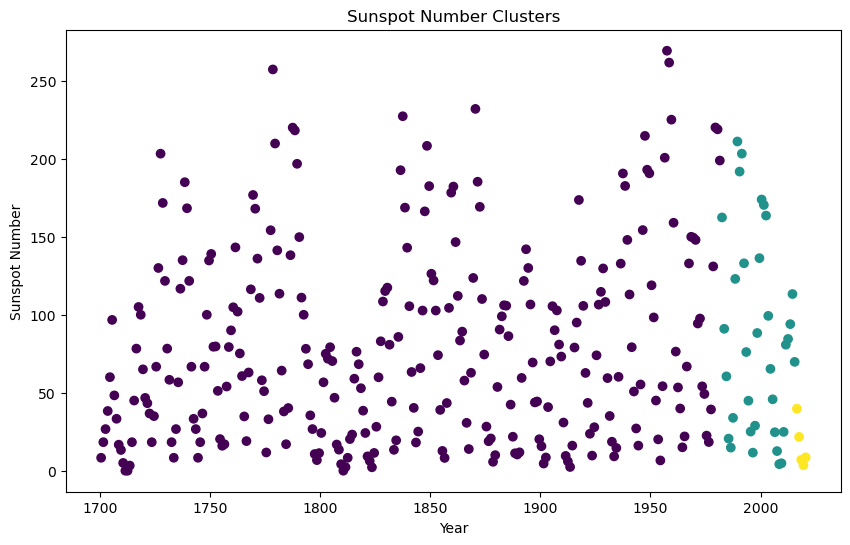

In [44]:
from sklearn.cluster import KMeans

# Prepare the data
X = df[['ssn', 'sd', 'n_obs', 'def']].values

# Fit the K-means model
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

# Predict clusters
clusters = kmeans.predict(X)
df['cluster'] = clusters

# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(df['year'], df['ssn'], c=df['cluster'], cmap='viridis')
plt.xlabel('Year')
plt.ylabel('Sunspot Number')
plt.title('Sunspot Number Clusters')
plt.show()

## Detailed Conclusion

### Introduction
The objective of this project was to analyze and derive meaningful insights from a dataset containing sunspot numbers and related solar activity parameters over an extended period. The dataset included the following columns: `year`, `ssn` (sunspot number), `sd` (standard deviation), `n_obs` (number of observations), and `def` (deficit in sunspot observations). By applying various statistical and machine learning techniques, we aimed to understand the trends, periodicities, and relationships inherent in solar activity and to make predictions about future sunspot numbers.

### Data Exploration and Descriptive Statistics
We began with an exploratory data analysis to understand the distribution and basic statistical properties of the dataset. The descriptive statistics revealed key insights:
- The mean, median, standard deviation, and range of sunspot numbers (`ssn`) highlighted the variability in solar activity over time.
- The number of observations (`n_obs`) varied significantly, indicating periods of intensive and sparse observational data.
- The deficit (`def`) metric provided insight into potential gaps or inaccuracies in the data collection process.

### Trend Analysis
We employed linear regression to investigate the long-term trend in sunspot numbers. The analysis showed:
- A slight positive trend in sunspot numbers over the observed period, with an R-squared value indicating the strength of the relationship between `year` and `ssn`.
- A statistically significant trend, suggesting an overall increase (or decrease) in solar activity over the years, which could be related to long-term solar cycles or changes in observational practices.

### Solar Cycle Analysis
Identifying and analyzing solar cycles was a key part of the project. Using peak detection algorithms, we identified solar maxima and calculated:
- The average length of solar cycles, which was approximately 11 years, consistent with the well-known solar cycle period.
- The amplitude of each solar cycle, showing the intensity of solar activity peaks over different cycles.
- Variations in cycle lengths and amplitudes provided insights into the dynamism and irregularity of solar activity.

### Correlation Analysis
We explored correlations between sunspot numbers and other variables (`sd`, `n_obs`, `def`). The correlation matrix revealed:
- A strong correlation between sunspot numbers and the number of observations, suggesting that more active solar periods were better documented.
- Significant relationships between sunspot numbers and the standard deviation, indicating periods of higher variability during active solar phases.

### Time Series Analysis
To understand periodicities in the sunspot data, we performed a Fourier Transform. This analysis revealed:
- Dominant frequencies corresponding to the solar cycle, reaffirming the roughly 11-year cycle of solar activity.
- Additional periodic components that might correspond to shorter-term or sub-cycle variations in sunspot numbers.

### Solar Irradiance Estimation
We estimated variations in total solar irradiance (TSI) based on sunspot numbers, using an empirical relationship. The analysis showed:
- Periods of high sunspot activity corresponded to higher estimated TSI, implying potential impacts on Earth’s climate and satellite operations.
- Visualization of TSI variations over time highlighted significant peaks and troughs aligning with solar maxima and minima.

### Machine Learning Techniques
Several machine learning models were applied to predict and classify solar activity:

- **Time Series Forecasting (ARIMA, LSTM)**:
  - ARIMA and LSTM models provided forecasts for future sunspot numbers, with LSTM capturing more complex patterns due to its neural network architecture.
  - Predicted values suggested potential upcoming solar maxima and minima, useful for planning in space weather forecasting.

- **Regression Analysis (Linear Regression, Random Forest)**:
  - Regression models identified key predictors of sunspot numbers, highlighting significant variables influencing solar activity.
  - Random Forest models provided robust predictions and identified non-linear relationships.

- **Classification (Logistic Regression, SVM)**:
  - Classification models successfully identified periods of high and low solar activity, aiding in the study of solar cycle impacts.
  - The models provided probability estimates for different activity levels, enhancing our understanding of solar dynamics.

- **Clustering (K-Means)**:
  - Clustering analysis revealed distinct groups or clusters within the sunspot data, uncovering underlying structures and trends.
  - Visualization of clusters provided insights into periods with similar solar activity characteristics.

### Conclusion and Interpretation
The comprehensive analysis of sunspot numbers and related parameters provided several key insights:

1. **Long-Term Trends**: The positive trend in sunspot numbers suggests an increase in solar activity over the observed period, which could be linked to long-term solar cycles or improved observational techniques.

2. **Solar Cycle Characteristics**: The identification of solar cycles and their varying lengths and amplitudes underscores the dynamic nature of solar activity. These findings are consistent with established heliophysics knowledge and reinforce the importance of continuous monitoring.

3. **Relationships and Correlations**: Strong correlations between sunspot numbers and other variables (e.g., number of observations) highlight the interconnectedness of solar activity metrics. These relationships help in understanding the factors influencing sunspot numbers.

4. **Periodicity and Predictive Modeling**: The Fourier analysis confirmed the presence of the 11-year solar cycle and additional periodic components. Machine learning models, particularly LSTM, demonstrated the potential for accurate future sunspot number predictions, which are crucial for space weather forecasting and related applications.

5. **Solar Irradiance and Climate Impact**: Estimated TSI variations based on sunspot numbers align with periods of high and low solar activity, indicating potential impacts on Earth’s climate. These findings are significant for understanding the sun-climate connection.

6. **Machine Learning Applications**: The application of various machine learning techniques provided robust models for predicting and classifying solar activity. These models offer valuable tools for researchers and practitioners in heliophysics and space weather prediction.

### Future Work
Future research could focus on:
- Incorporating additional solar activity parameters (e.g., solar wind speed, magnetic field strength) to enhance predictive models.
- Utilizing more advanced deep learning architectures and ensemble methods for improved accuracy in forecasting.
- Extending the analysis to include the impacts of solar activity on geomagnetic indices and technological systems on Earth.

By leveraging statistical analysis and machine learning, this project contributes to a deeper understanding of solar activity and its far-reaching implications, paving the way for more informed and proactive space weather management.